In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from abc_analysis import abc_analysis, abc_plot
from scipy.stats import norm

In [1]:
file_path = r"\2021-ascm-case-competition_school-round_data-exhibits 1 (3).xlsx"

try:
    with open(file_path):
        pass
except FileNotFoundError:
    print(f"File not found: {file_path}")
    
# Read Excel sheets
try:
   stock_AN= pd.read_excel(file_path, sheet_name="Data Exhibit-2", index_col=0)
except FileNotFoundError:
    print(f"Error reading Excel file: {file_path}")

stock_AN.columns = stock_AN.columns.str.replace('\n', '').str.strip()
stock_AN.head()

File not found: \2021-ascm-case-competition_school-round_data-exhibits 1 (3).xlsx


NameError: name 'pd' is not defined

In [3]:
data = pd.DataFrame(stock_AN)




import pandas as pd

data['APU Projected in the 30 Oct'] = data['APU(units)'] * (1 + data['APU Trend'])


data['On Hand Inventory 30 Sep (units)'] = data['On-Hand Stock ($)'] / data['Std. Price ($)']

data['APU Projected (days)'] = data['APU Projected in the 30 Oct'] / 30 
data['Lead Time of Demand projcted'] = data['Lead Time (days)'] * data['APU Projected (days)']

data['Std Dev Demand Lead Time'] = data['Demand variability (COV)'] * data['APU(units)'] * np.sqrt(data['Lead Time (days)'] + 30)  

data['Safety Stock 95%'] = data['Std Dev Demand Lead Time'] * 1.64
data['ROP'] = data['Safety Stock 95%'] +(data['Lead Time of Demand projcted'] )


data['Status'] = 'Stock Enough'
data.loc[data['On Hand Inventory 30 Sep (units)'] < data['APU Projected in the 30 Oct'], 'Status'] = 'Stock Out'



output_excel_path = 'out_file100.xlsx'  
data.to_excel(output_excel_path, index=False)
print(f"DataFrame has been exported to Excel: {output_excel_path}")

DataFrame has been exported to Excel: out_file100.xlsx


In [4]:
dat = pd.DataFrame(stock_AN)

dat['APU (days)'] = dat['APU(units)'] / 30

dat['APU Projected (units)'] = dat['APU(units)'] * (1 + dat['APU Trend'])
dat['APU Projected (days)'] = dat['APU Projected (units)'] / 30 


dat['Lead Time of Demand'] = dat['Lead Time (days)'] * dat['APU (days)']
dat['Lead Time of Demand projcted'] = dat['Lead Time (days)'] * dat['APU Projected (days)']

dat['Std Dev Demand Lead Time'] = dat['Demand variability (COV)'] * dat['APU(units)'] * np.sqrt(dat['Lead Time (days)'] + 30)  
dat['Safety Stock 95%'] = dat['Std Dev Demand Lead Time'] * 1.64

dat['ROP'] = dat['Safety Stock 95%']
# Calculate for 30sep
dat['On Hand Inventory 30 Sep'] = dat['On-Hand Stock ($)'] / dat['Std. Price ($)'] 
dat['On Order Inventory 30 Sep'] = (dat['Safety Stock 95%'] + dat['APU(units)']) - dat['ROP']
dat['Position Inventory 30 sep'] = dat['On Hand Inventory 30 Sep'] + dat['On Order Inventory 30 Sep']

# Calculate for 30oct
dat['On Hand Inventory 30 oct'] = dat['Position Inventory 30 sep'] -  dat['Lead Time of Demand projcted']* dat['S-OTD']
dat['On Order Inventory 30 oct'] = ( dat['Safety Stock 95%'] + dat['APU Projected (units)']) - dat['ROP']
dat['Position Inventory 30 oct'] = dat['On Order Inventory 30 oct'] + dat['On Hand Inventory 30 oct']


dat['Change inventory position']= dat['Position Inventory 30 sep'] - dat['Position Inventory 30 oct'] 



#print(data[['SKU', 'APU(units)', 'PU Projected (units)', 'Lead Time of Demand', 'Std Dev Demand Lead Time',
            #'Safety Stock 95%', 'On Hand Inventory 30 Sep', 'On Order Inventory', 'Position Inventory',
            #'Change Inventory Position']])



output_excel_path = 'out_file1000.xlsx'  
dat.to_excel(output_excel_path, index=False)
print(f"DataFrame has been exported to Excel: {output_excel_path}")

DataFrame has been exported to Excel: out_file1000.xlsx


In [5]:
stock_AN.head()

,SKU,Std. Price ($),On-Hand Stock ($),APU(units),APU Trend,S-OTD,Demand variability (COV),Lead Time (days)
1,14171.732125,33.762953,5837.312718,122,-0.1,0.77,1.56,23
2,52169.042825,12.089326,1532.719476,178,0.2,0.85,1.80,12
3,72156.257446,11.756134,4562.334137,324,-0.4,0.77,1.38,21
4,8954.076984,8.157692,4156.895262,414,0.5,0.70,1.99,15
5,94785.831804,5.269414,587.585764,170,1.2,0.80,0.92,15


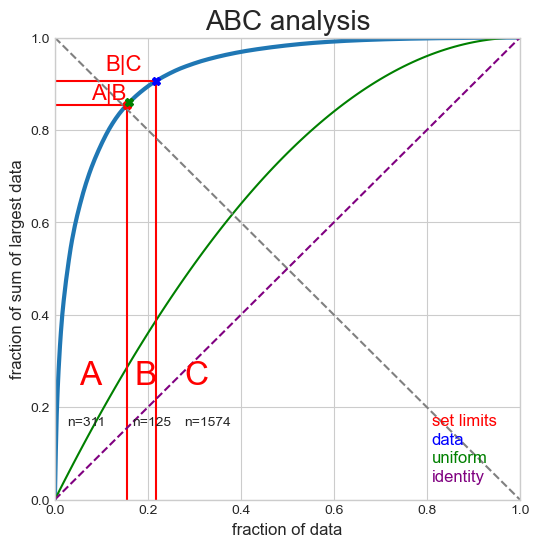

DataFrame has been exported to Excel: the_100.xlsx


In [6]:
from abc_analysis import abc_analysis, abc_plot
import numpy as np
stock_AN['Annual_Consumption'] = stock_AN['APU(units)'] * stock_AN['Std. Price ($)'] * 12
stock_AN['Obsolete inventory $'] = stock_AN['On-Hand Stock ($)']-stock_AN['Annual_Consumption']
stock_AN['Obsolete inventory $ 01'] = stock_AN['Obsolete inventory $'].clip(lower=0)

abc_results = abc_analysis(stock_AN['Annual_Consumption'], True)


a_index = abc_results['Aind']
b_index = abc_results['Bind']
c_index = abc_results['Cind']

# New Column indicating A, B, or C
cond_list = [stock_AN.index.isin(a_index),
             stock_AN.index.isin(b_index),
             stock_AN.index.isin(c_index)]

choice_list = ['A', 'B', 'C']

stock_AN['abc_results'] = np.select(cond_list, choice_list)


stock_AN.sort_values(by=['Annual_Consumption'], ascending=False, inplace=True)

output_excel_path = 'the_100.xlsx'  
stock_AN.to_excel(output_excel_path, index=False)
print(f"DataFrame has been exported to Excel: {output_excel_path}")
